In [3]:
import pandas as pd

In [5]:
import numpy as np

In [13]:
#Upload dataet and diplay the first five rows
df = pd.read_csv('1. Weather Data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
#import the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [7]:
#Display column names
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [11]:
#Display data type variables of the various columns
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [13]:
Visibility_counts=df["Visibility_km"].value_counts()
Visibility_counts

Visibility_km
25.0    3324
48.3    2014
24.1    1921
19.3     281
16.1     224
9.7      181
12.9     174
6.4      129
8.0      122
4.8       79
4.0       55
2.4       50
3.2       42
11.3      36
1.2       28
2.0       28
1.6       25
0.6       16
2.8       15
1.0       11
3.6       11
0.2        8
0.8        7
0.4        3
Name: count, dtype: int64

In [15]:
weather_counts=df["Weather"].value_counts()
weather_counts

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [ ]:
date_counts=df["Visibility_km"].value_counts()
date_counts

In [17]:
#Convert data/time column from float data type to 'date.time' format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [31]:
#Display column names
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [19]:
#Give more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [15]:
#Convert to the correct date/time format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [17]:
#Include integer values in the final output
numerical_df = df.select_dtypes(include=['number'])

In [19]:
#Convert to date.time format the numerical_df
numerical_df['Date/Time'] = df['Date/Time']

In [21]:
#Group by the Daily Average of Date/Time
grouped_by_date = numerical_df.groupby(numerical_df['Date/Time'].dt.date).mean()

In [156]:
#Display output
print(grouped_by_date)

               Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                             
2012-01-01   0.629167         -1.450000  86.125000        12.666667   
2012-01-02   0.041667         -6.200000  63.083333        31.416667   
2012-01-03 -14.416667        -21.537500  54.791667        22.041667   
2012-01-04 -13.645833        -19.250000  62.875000        10.500000   
2012-01-05  -6.750000        -11.416667  70.000000        12.125000   
...               ...               ...        ...              ...   
2012-12-27  -5.833333         -7.387500  88.833333        34.833333   
2012-12-28  -6.775000         -9.175000  83.083333        17.916667   
2012-12-29 -11.345833        -12.841667  88.666667        14.625000   
2012-12-30 -11.370833        -14.179167  79.791667        21.833333   
2012-12-31  -5.604167         -7.766667  84.750000        12.916667   

            Visibility_km   Press_kPa           Date/Time  
Date/Time       

Text(0, 0.5, 'Relative Humidity')

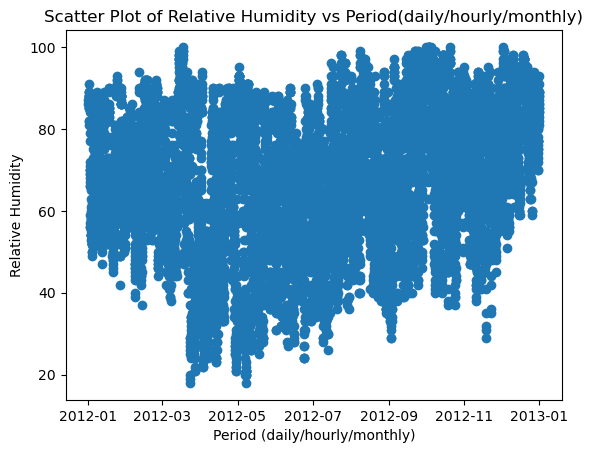

In [143]:
#Scatter Plot of Relative Humidity vs Period(daily/hourly/monthly)
y = df["Rel Hum_%"]
x = df["Date/Time"]
plt.scatter(x,y)
plt.title("Scatter Plot of Relative Humidity vs Period(hourly/daily/monthly)")
plt.xlabel("Period (daily/hourly/monthly)")
plt.ylabel("Relative Humidity")

Text(0, 0.5, 'Wind Speed')

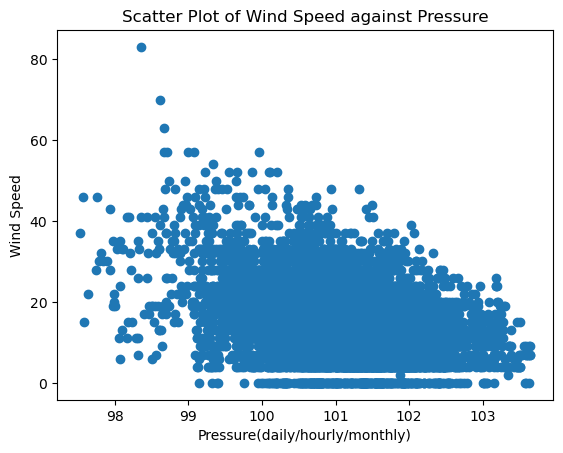

In [33]:
#Scatter plot of Wind Speed against Pressure Daily Average
y = df["Wind Speed_km/h"]
x = df["Press_kPa"]
plt.scatter(x,y)
plt.title("Scatter Plot of Wind Speed against Pressure")
plt.xlabel("Pressure(daily/hourly/monthly)")
plt.ylabel("Wind Speed")

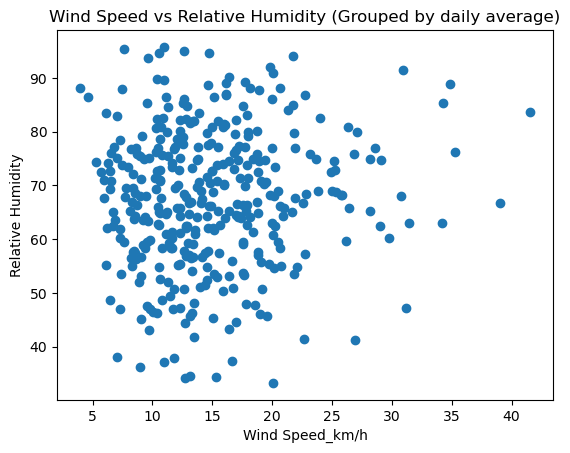

In [31]:
# Scatter plot Wind Speed vs Relative Humidity ('Grouped by daily average')
plt.scatter(grouped_by_date['Wind Speed_km/h'], grouped_by_date['Rel Hum_%'])
plt.xlabel('Wind Speed_km/h')
plt.ylabel('Relative Humidity')
plt.title('Wind Speed vs Relative Humidity (Grouped by daily average)')
plt.show()

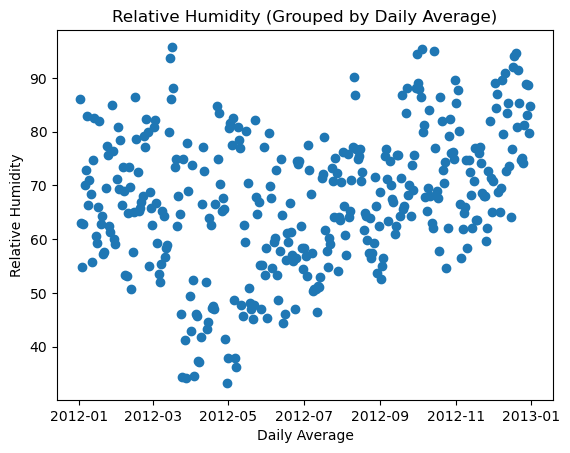

In [140]:
# Scatter plot (Grouped by 'grouped_by_date') Relative Humidity Daily Average
plt.scatter(grouped_by_date['Date/Time'], grouped_by_date['Rel Hum_%'])
plt.xlabel('Daily Average')
plt.ylabel('Relative Humidity')
plt.title('Relative Humidity (Grouped by Daily Average)')
plt.show()

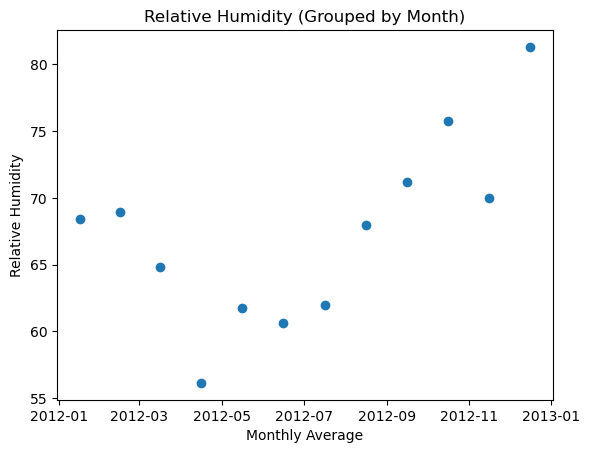

In [152]:
# Scatter plot Grouped by Monthly Average of Relative Humidity
plt.scatter(grouped_by_month['Date/Time'], grouped_by_month['Rel Hum_%'])
plt.xlabel('Monthly Average')
plt.ylabel('Relative Humidity')
plt.title('Relative Humidity (Grouped by Month)')
plt.show()

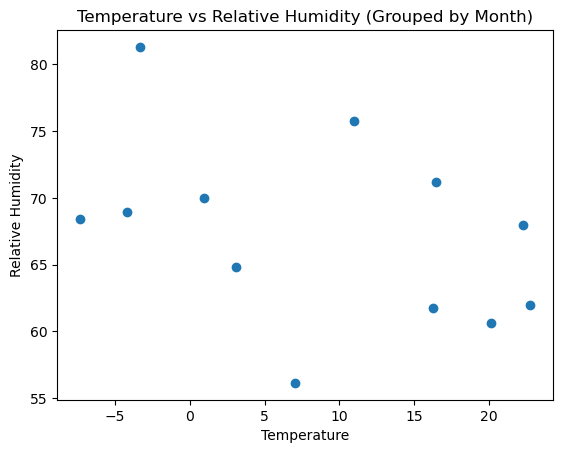

In [154]:
# Scatter plot Grouped by Monthly Average of Temperature vs Relative Humidity
plt.scatter(grouped_by_month['Temp_C'], grouped_by_month['Rel Hum_%'])
plt.xlabel('Temperature')
plt.ylabel('Relative Humidity')
plt.title('Temperature vs Relative Humidity (Grouped by Month)')
plt.show()

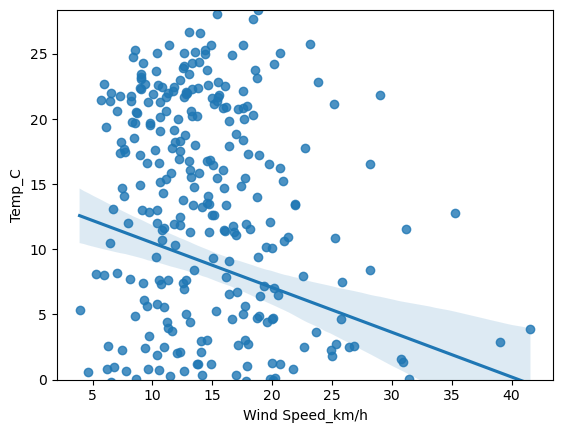

In [168]:
# Group by daily average (grouped by date) and calculate the mean
grouped_df = numerical_df.groupby(numerical_df['Date/Time'].dt.date).mean()
# Draw the Plot
sns.regplot(x="Wind Speed_km/h", y="Temp_C", data=grouped_df)
plt.ylim(0, grouped_df['Temp_C'].max())  # Set y-axis limit starting from 0
plt.show()

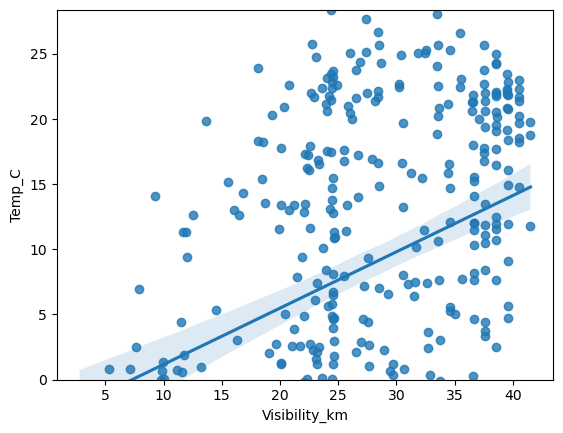

In [172]:
# Group by 'grouped_by_date' and calculate the mean
grouped_df = numerical_df.groupby(numerical_df['Date/Time'].dt.date).mean()
# Draw the Plot
sns.regplot(x="Visibility_km", y="Temp_C", data=grouped_df)
plt.ylim(0, grouped_df['Temp_C'].max())  # Set y-axis limit starting from 0
#display the plot
plt.show()

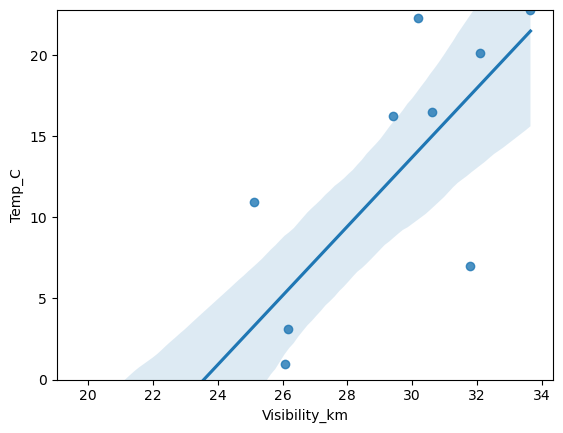

In [174]:
# Group by monthly average ('grouped_by_month') and calculate the mean
grouped_df = numerical_df.groupby(numerical_df['Date/Time'].dt.to_period('M')).mean()
# Draw the Plot
sns.regplot(x="Visibility_km", y="Temp_C", data=grouped_df)
plt.ylim(0, grouped_df['Temp_C'].max())  # Set y-axis limit starting from 0
#display the plot
plt.show()

In [23]:
# Specify the weather condition you want to filter by 'Clear'
specific_weather_condition = 'Clear'

# Filter the DataFrame based on the specific weather condition
filtered_df = df[df['Weather'] == specific_weather_condition]

# Convert 'Date/Time' to day and month formats
filtered_df['Day'] = filtered_df['Date/Time'].dt.date  # Extract the date (day)
filtered_df['Month'] = filtered_df['Date/Time'].dt.to_period('M')

# Group by 'Weather' and 'Day' and calculate the mean of 'Date/Time'
grouped_by_day = filtered_df.groupby(['Weather', 'Day'])['Date/Time'].mean()

# Group by 'Weather' and 'Month' and calculate the mean of 'Date/Time'
grouped_by_month = filtered_df.groupby(['Weather', 'Month'])['Date/Time'].mean()

# Display the results
print(f"Mean Date/Time per Day for {specific_weather_condition}:\n", grouped_by_day)
print(f"\nMean Date/Time per Month for {specific_weather_condition}:\n", grouped_by_month)



Mean Date/Time per Day for Clear:
 Weather  Day       
Clear    2012-01-03   2012-01-03 19:00:00
         2012-01-05   2012-01-05 19:30:00
         2012-01-11   2012-01-11 02:30:00
         2012-01-15   2012-01-15 17:54:00
         2012-01-16   2012-01-16 03:00:00
                              ...        
         2012-12-25   2012-12-25 19:00:00
         2012-12-26   2012-12-26 03:00:00
         2012-12-28   2012-12-28 10:00:00
         2012-12-29   2012-12-29 01:30:00
         2012-12-30   2012-12-30 20:00:00
Name: Date/Time, Length: 216, dtype: datetime64[ns]

Mean Date/Time per Month for Clear:
 Weather  Month  
Clear    2012-01   2012-01-19 16:56:06.233766144
         2012-02   2012-02-14 18:34:55.890411008
         2012-03   2012-03-19 13:37:32.903225856
         2012-04   2012-04-13 20:54:11.612903168
         2012-05   2012-05-18 11:33:34.678899200
         2012-06   2012-06-16 10:36:00.000000000
         2012-07   2012-07-15 06:53:01.395348736
         2012-08   2012-08-16 08:

C:\Users\Anna\AppData\Local\Temp\ipykernel_3380\3226817266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Day'] = filtered_df['Date/Time'].dt.date  # Extract the date (day)
C:\Users\Anna\AppData\Local\Temp\ipykernel_3380\3226817266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['Date/Time'].dt.to_period('M')


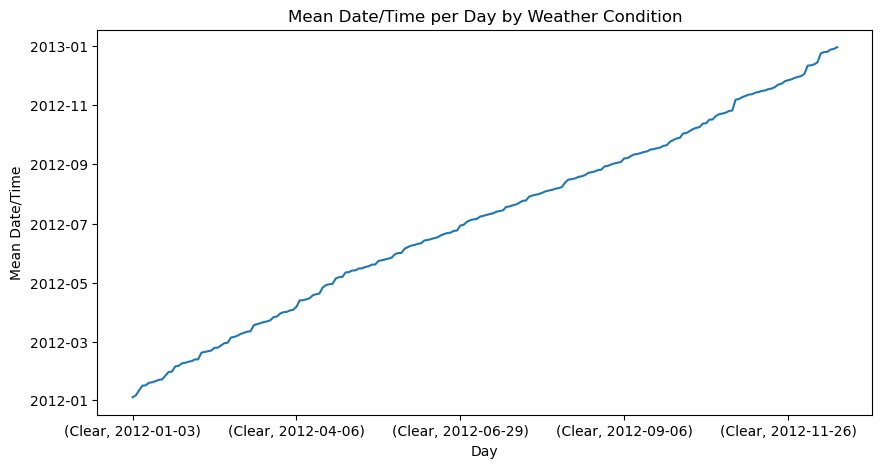

In [29]:
# Line chart of weather condition vs Mean Date/Time Daily
plt.figure(figsize=(10, 5))
grouped_by_day.plot(kind='line')
plt.title('Mean Date/Time per Day by Weather Condition')
plt.xlabel('Day')
plt.ylabel('Mean Date/Time')
plt.show()

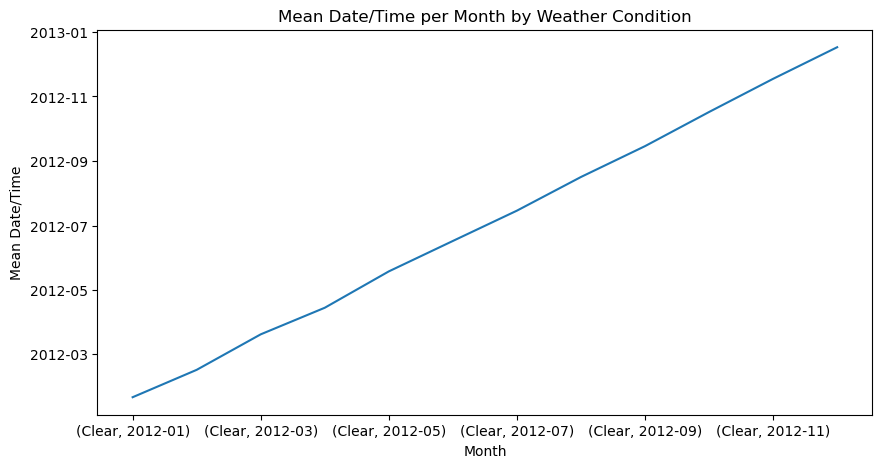

In [25]:
# Line chart of weather condition vs Mean Date/Time per Month
plt.figure(figsize=(10, 5))
grouped_by_month.plot(kind='line')
plt.title('Mean Date/Time per Month by Weather Condition')
plt.xlabel('Month')
plt.ylabel('Mean Date/Time')
plt.show()

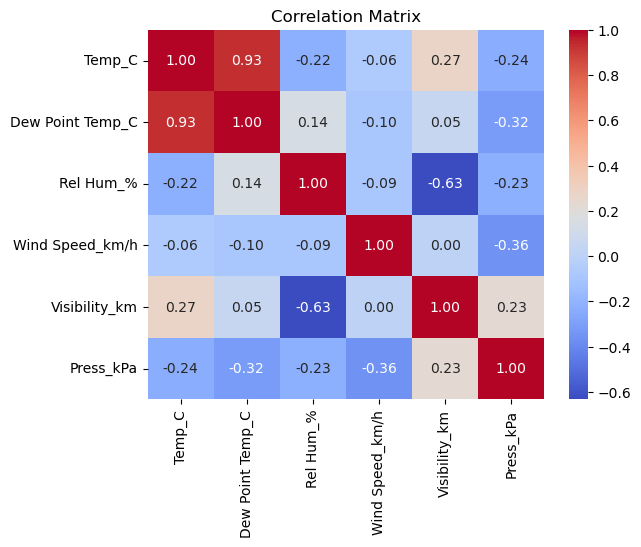

In [69]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


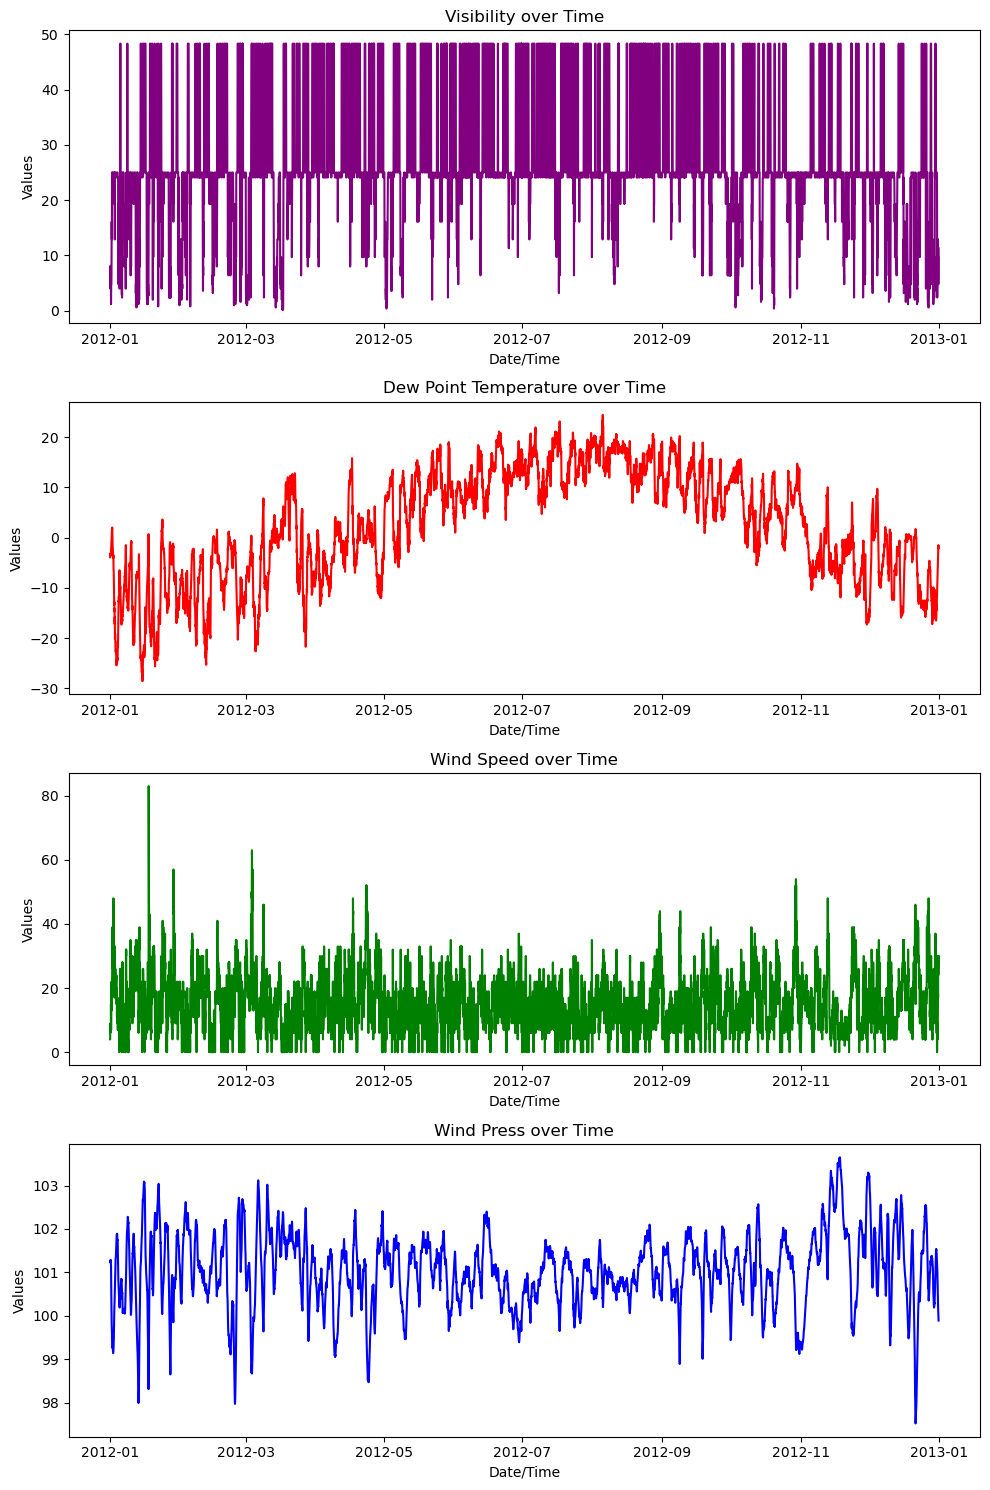

In [133]:
#Create subplots used for detailed comparison of variables on separate plots.
# Create a figure and an array of subplots (4 subplots, stacked vertically)
#axs refers to the position in the array
fig, axs = plt.subplots(4, 1, figsize=(10,15))

# Each variable is plotted on a separate subplot
axs[0].plot(df['Date/Time'], df['Visibility_km'], color='purple')
axs[0].set_title('Visibility over Time')

axs[1].plot(df['Date/Time'], df['Dew Point Temp_C'], color='red')
axs[1].set_title('Dew Point Temperature over Time')

axs[2].plot(df['Date/Time'], df['Wind Speed_km/h'], color='green')
axs[2].set_title('Wind Speed over Time')

axs[3].plot(df['Date/Time'], df['Press_kPa'], color='blue')
axs[3].set_title('Wind Press over Time')

for ax in axs:
    ax.set_xlabel('Date/Time')
    ax.set_ylabel('Values')
    
# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

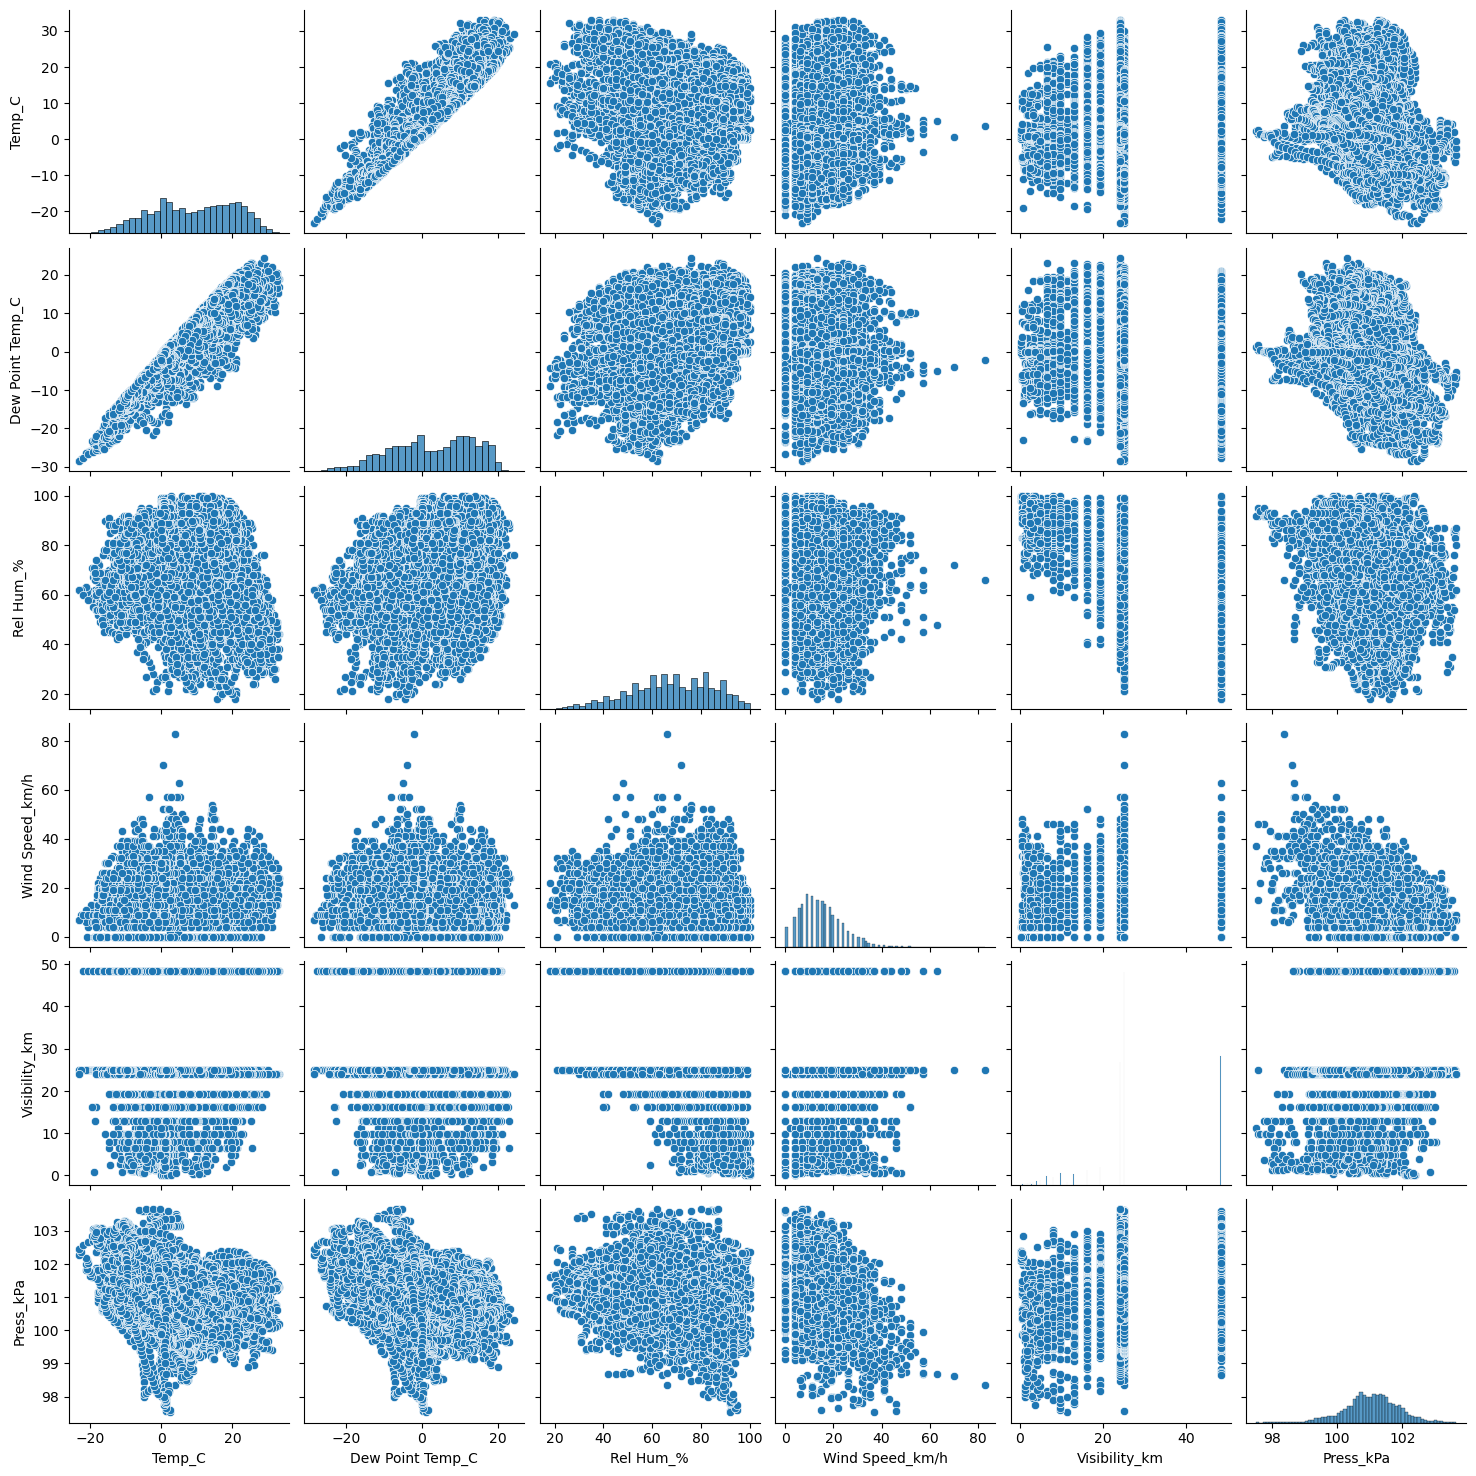

In [135]:
sns.pairplot(df)
plt.show()

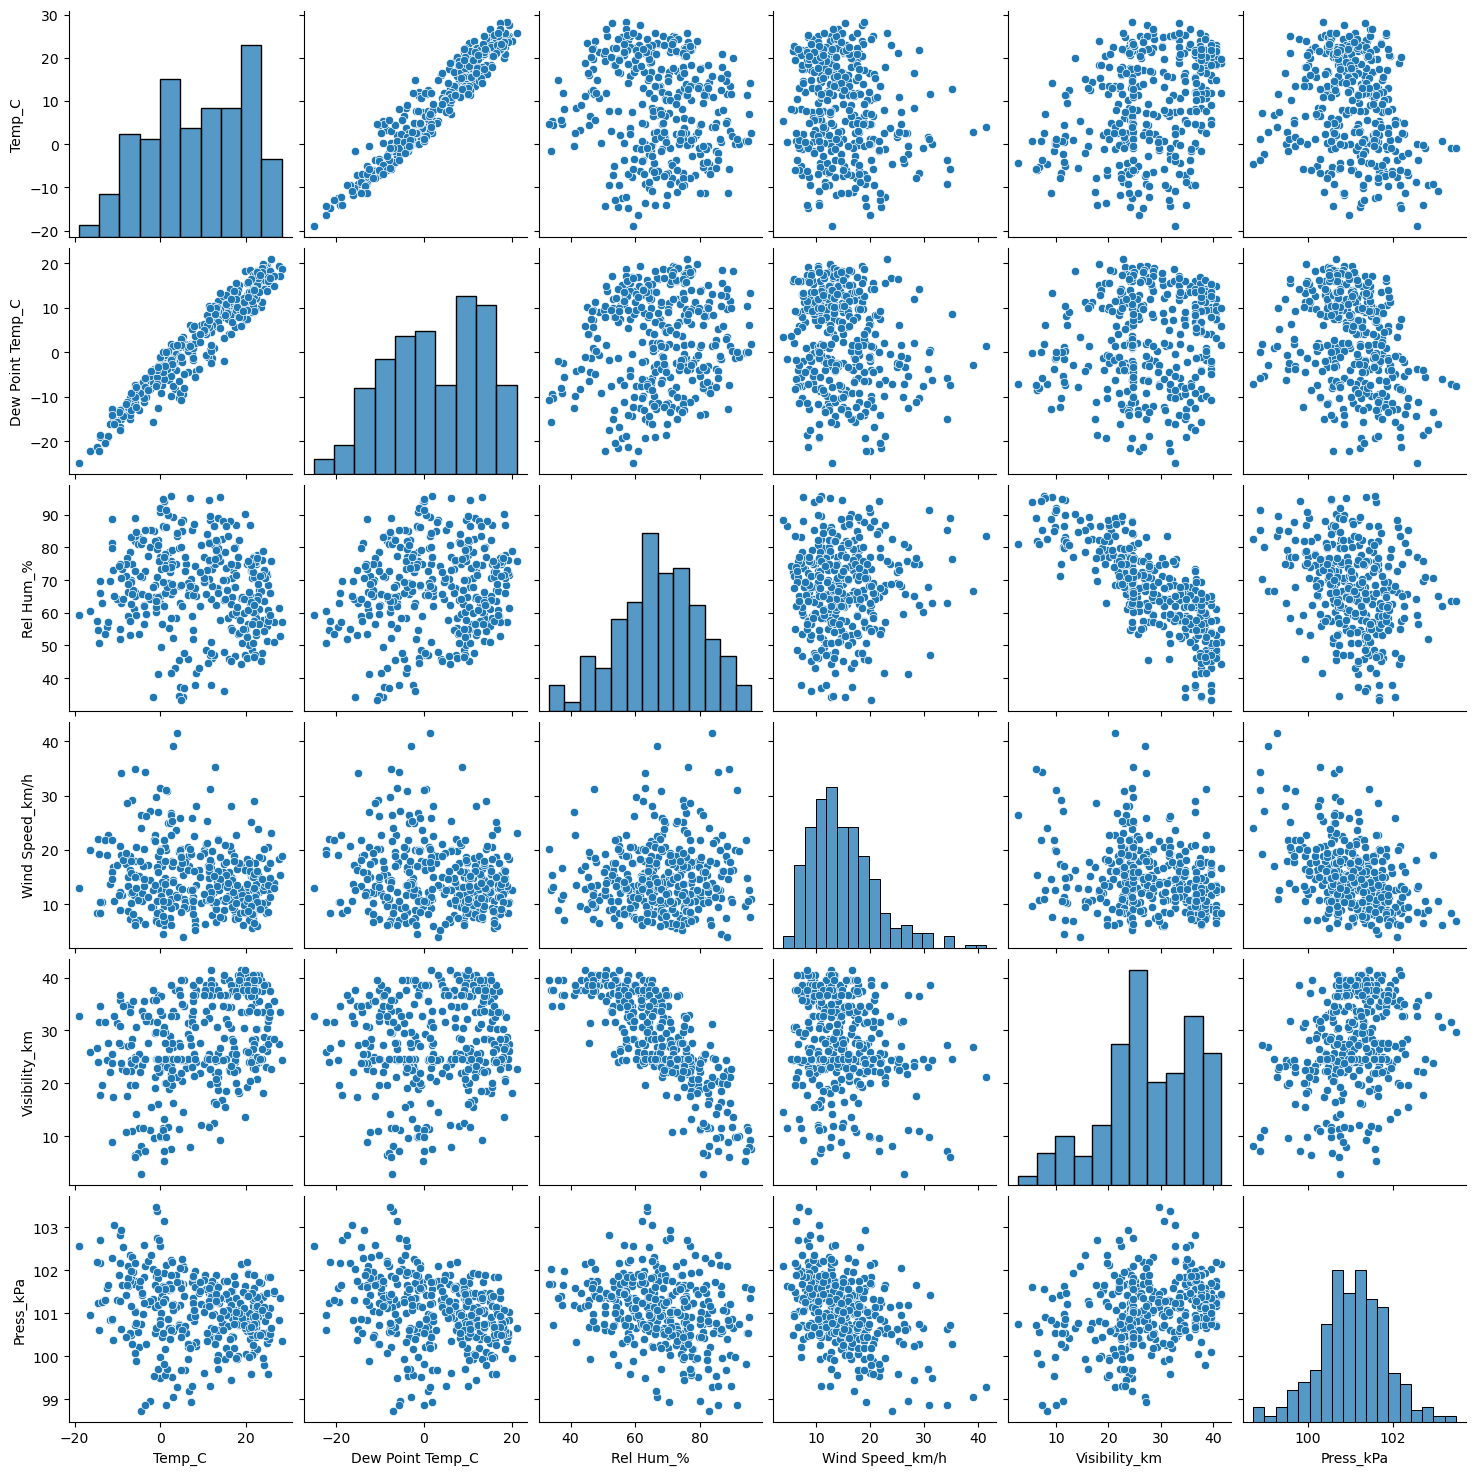

In [141]:
sns.pairplot(grouped_by_date)

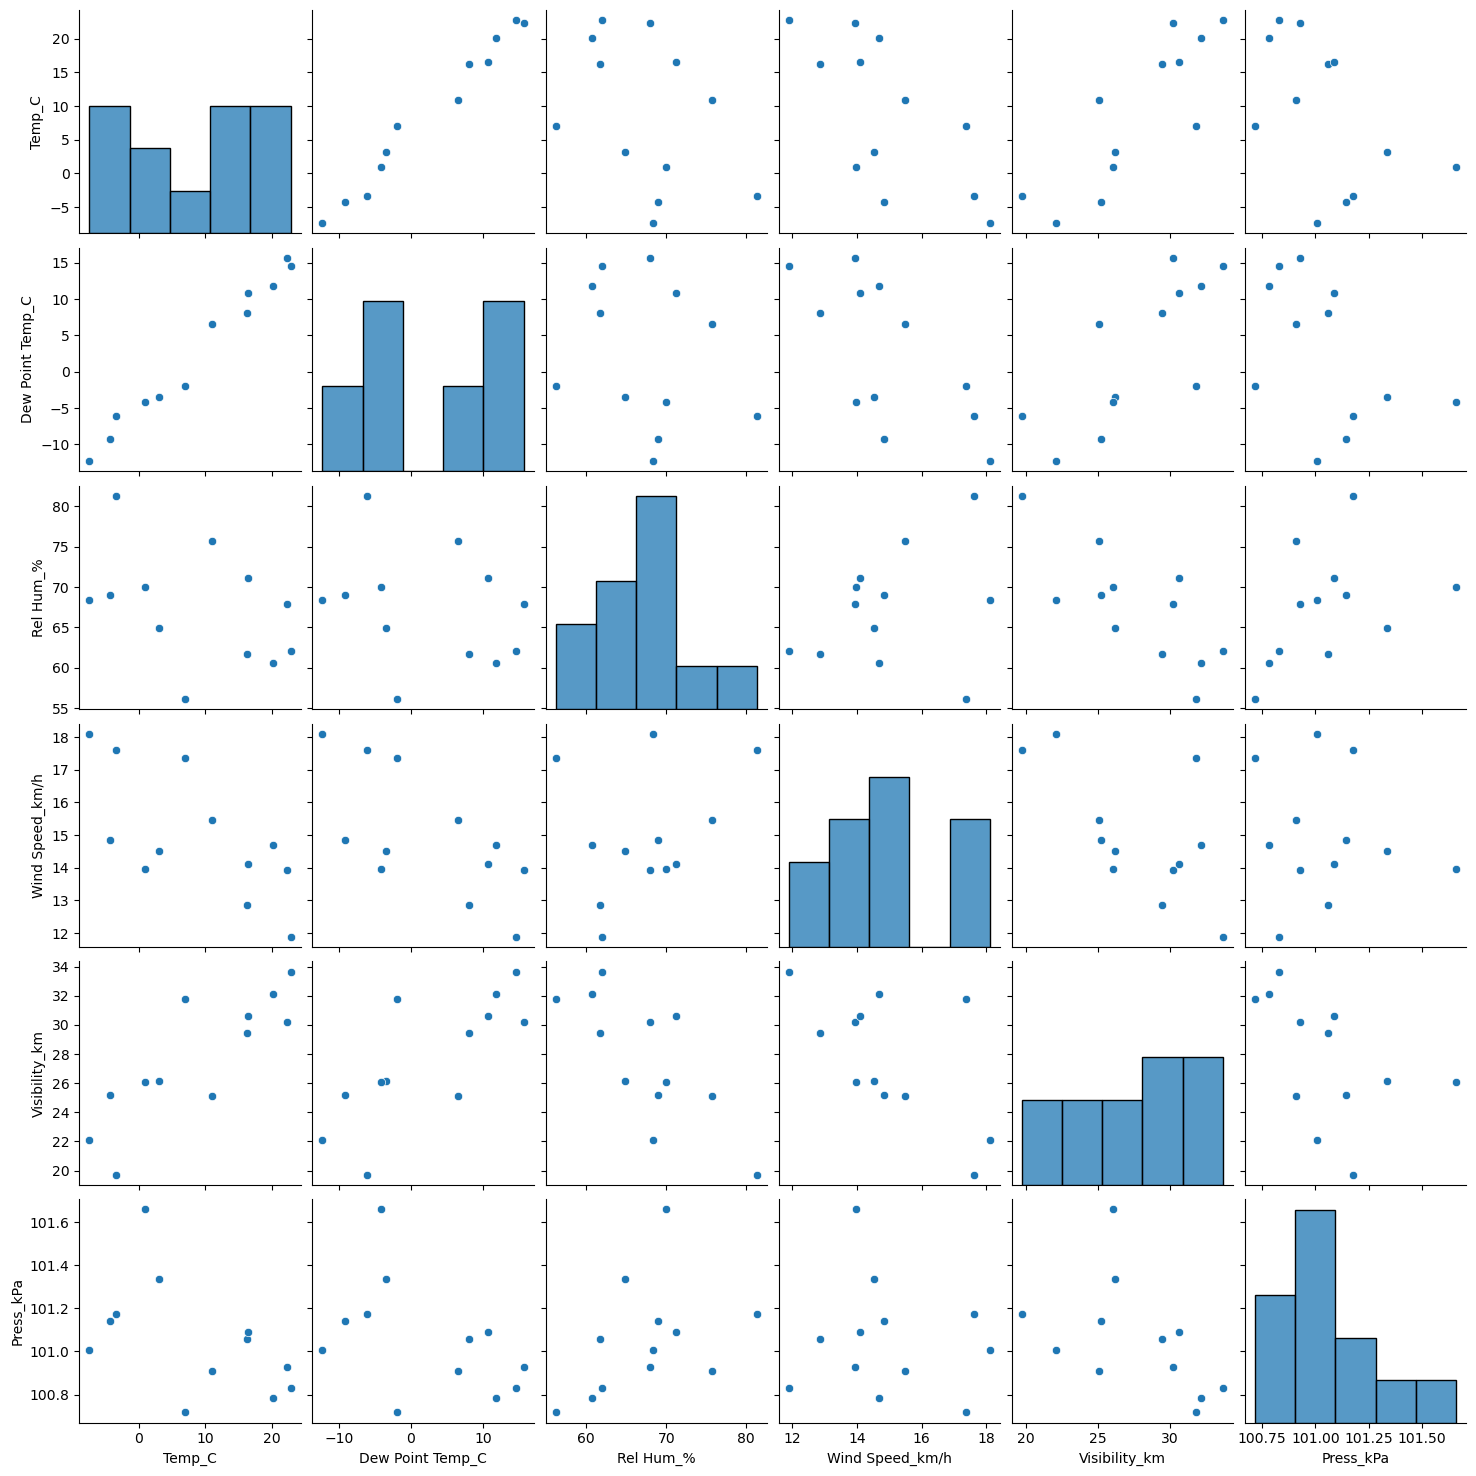

In [139]:
sns.pairplot(grouped_by_month)

In [144]:
numerical_df = df.select_dtypes(include=['number'])

In [146]:
numerical_df['Date/Time'] = df['Date/Time']

In [148]:
grouped_by_month = numerical_df.groupby(numerical_df['Date/Time'].dt.to_period('M')).mean()

In [150]:
print(grouped_by_month)

              Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                            
2012-01    -7.371505        -12.294758  68.383065        18.108871   
2012-02    -4.225000         -9.221695  68.956897        14.837644   
2012-03     3.121237         -3.488575  64.862903        14.514785   
2012-04     7.009306         -1.934583  56.150000        17.369444   
2012-05    16.237769          8.080780  61.760753        12.846774   
2012-06    20.134028         11.738056  60.643056        14.681944   
2012-07    22.790054         14.595430  62.017473        11.887097   
2012-08    22.279301         15.644758  67.943548        13.931452   
2012-09    16.484444         10.757917  71.165278        14.108333   
2012-10    10.954973          6.533468  75.731183        15.475806   
2012-11     0.931389         -4.179306  69.984722        13.973611   
2012-12    -3.306317         -6.129032  81.299731        17.614247   

           Visibili

In [ ]:
# Specify the weather conditions you want to filter by.
specific_weather_condition = ['Mostly Fog', 'Fog']

# Filter the DataFrame based on the specific weather condition
filtered_df = df[df['Weather'].isin(specific_weather_condition)]

# Convert 'Date/Time' to day and month formats
filtered_df['Day'] = filtered_df['Date/Time'].dt.date  # Extract the date (day)
filtered_df['Month'] = filtered_df['Date/Time'].dt.to_period('M')

# Group by 'Weather' and 'Day' as 'Date/Time'
grouped_by_day = filtered_df.groupby(['Weather', 'Day'])['Date/Time'].mean()

# Group by 'Weather' and 'Month' as'Date/Time'
grouped_by_month = filtered_df.groupby(['Weather', 'Month'])['Date/Time'].mean

# Display the results
print(f"\nDate/Time per Day for {specific_weather_condition}:\n", grouped_by_day)
print(f"\nDate/Time per Month for {specific_weather_condition}:\n", grouped_by_month)